<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Structural_Bioinformatics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
from Bio.PDB import PDBParser

parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", "/content/pdb1a3n.ent")  # example: hemoglobin alpha

for model in structure:
    for chain in model:
        print("Chain:", chain.id)
        for residue in chain.get_residues():
            print(residue.resname, residue.id)
        break
    break

Chain: A
VAL (' ', 1, ' ')
LEU (' ', 2, ' ')
SER (' ', 3, ' ')
PRO (' ', 4, ' ')
ALA (' ', 5, ' ')
ASP (' ', 6, ' ')
LYS (' ', 7, ' ')
THR (' ', 8, ' ')
ASN (' ', 9, ' ')
VAL (' ', 10, ' ')
LYS (' ', 11, ' ')
ALA (' ', 12, ' ')
ALA (' ', 13, ' ')
TRP (' ', 14, ' ')
GLY (' ', 15, ' ')
LYS (' ', 16, ' ')
VAL (' ', 17, ' ')
GLY (' ', 18, ' ')
ALA (' ', 19, ' ')
HIS (' ', 20, ' ')
ALA (' ', 21, ' ')
GLY (' ', 22, ' ')
GLU (' ', 23, ' ')
TYR (' ', 24, ' ')
GLY (' ', 25, ' ')
ALA (' ', 26, ' ')
GLU (' ', 27, ' ')
ALA (' ', 28, ' ')
LEU (' ', 29, ' ')
GLU (' ', 30, ' ')
ARG (' ', 31, ' ')
MET (' ', 32, ' ')
PHE (' ', 33, ' ')
LEU (' ', 34, ' ')
SER (' ', 35, ' ')
PHE (' ', 36, ' ')
PRO (' ', 37, ' ')
THR (' ', 38, ' ')
THR (' ', 39, ' ')
LYS (' ', 40, ' ')
THR (' ', 41, ' ')
TYR (' ', 42, ' ')
PHE (' ', 43, ' ')
PRO (' ', 44, ' ')
HIS (' ', 45, ' ')
PHE (' ', 46, ' ')
ASP (' ', 47, ' ')
LEU (' ', 48, ' ')
SER (' ', 49, ' ')
HIS (' ', 50, ' ')
GLY (' ', 51, ' ')
SER (' ', 52, ' ')
ALA (' ', 53

In [119]:
coords = []
for model in structure:
    for chain in model:
        for residue in chain:
            if "CA" in residue:  # alpha carbon
                coords.append(residue["CA"].get_coord())

print("Extracted", len(coords), "Cα atoms")

Extracted 572 Cα atoms


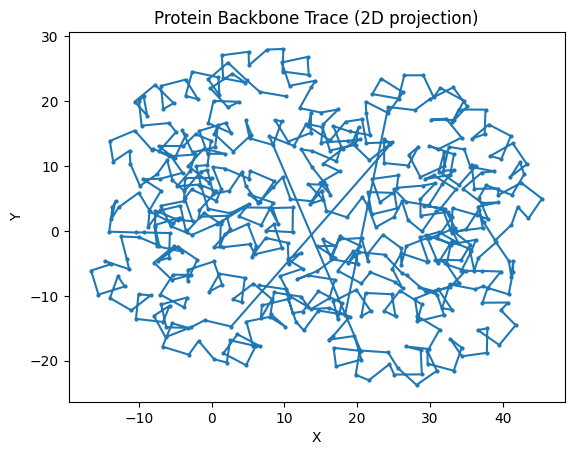

In [120]:
import matplotlib.pyplot as plt
import numpy as np

coords = np.array(coords)
plt.plot(coords[:,0], coords[:,1], marker="o", markersize=2)
plt.title("Protein Backbone Trace (2D projection)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [121]:
from scipy.spatial.distance import euclidean

residues = list(structure.get_residues())
dist = euclidean(residues[10]["CA"].get_coord(), residues[50]["CA"].get_coord())

print(f"Distance between residue 10 and 50: {dist:.2f} Å")

Distance between residue 10 and 50: 28.24 Å


In [122]:
ligand_atoms = [atom for residue in residues if residue.id[0] != " " for atom in residue]
protein_atoms = [atom for residue in residues if residue.id[0] == " " for atom in residue]

close_contacts = []
for la in ligand_atoms:
    for pa in protein_atoms:
        if la - pa < 4.0:  # distance in Å
            close_contacts.append((la.get_name(), pa.get_full_id(), la - pa))

print("Close contacts between ligand & protein:", close_contacts[:10])

Close contacts between ligand & protein: [('CHA', ('protein', 0, 'A', (' ', 58, ' '), ('CE1', ' ')), np.float32(3.3621287)), ('CHA', ('protein', 0, 'A', (' ', 91, ' '), ('CD1', ' ')), np.float32(3.6819303)), ('CHB', ('protein', 0, 'A', (' ', 62, ' '), ('CG2', ' ')), np.float32(3.9856474)), ('CHB', ('protein', 0, 'A', (' ', 87, ' '), ('CE1', ' ')), np.float32(3.9308774)), ('CHC', ('protein', 0, 'A', (' ', 98, ' '), ('CD2', ' ')), np.float32(3.7168348)), ('CHC', ('protein', 0, 'A', (' ', 98, ' '), ('CE2', ' ')), np.float32(3.4733794)), ('CHC', ('protein', 0, 'A', (' ', 101, ' '), ('CD2', ' ')), np.float32(3.5807328)), ('CHD', ('protein', 0, 'A', (' ', 43, ' '), ('CE1', ' ')), np.float32(3.9740195)), ('CHD', ('protein', 0, 'A', (' ', 43, ' '), ('CZ', ' ')), np.float32(3.4704287)), ('CHD', ('protein', 0, 'A', (' ', 93, ' '), ('CG2', ' ')), np.float32(3.630935))]


In [123]:
import py3Dmol

view = py3Dmol.view(query="pdb:1a3n", width=400, height=400)
view.setStyle({"cartoon": {"color":"spectrum"}})
view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.